Fonte:

https://facebook.github.io/prophet/docs/quick_start.html#python-api

In [1]:
import pandas as pd
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


<Axes: >

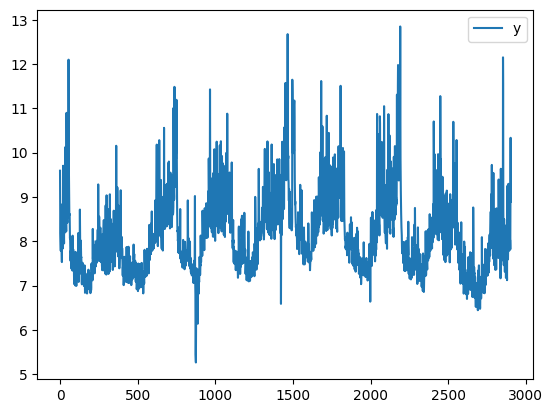

In [3]:
df.plot()

In [4]:
m = Prophet()
m.fit(df)


15:25:48 - cmdstanpy - INFO - Chain [1] start processing
15:25:49 - cmdstanpy - INFO - Chain [1] done processing


In [5]:
future = m.make_future_dataframe(periods=365)
future

,ds
0,2007-12-10
1,2007-12-11
2,2007-12-12
3,2007-12-13
4,2007-12-14
...,...
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18


In [6]:
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.039995,8.225525,9.483099,8.039995,8.039995,0.803072,0.803072,0.803072,0.352285,0.352285,0.352285,0.450787,0.450787,0.450787,0.0,0.0,0.0,8.843067
1,2007-12-11,8.038455,7.968574,9.201493,8.038455,8.038455,0.553164,0.553164,0.553164,0.119640,0.119640,0.119640,0.433524,0.433524,0.433524,0.0,0.0,0.0,8.591619
2,2007-12-12,8.036915,7.789610,9.023081,8.036915,8.036915,0.350535,0.350535,0.350535,-0.066661,-0.066661,-0.066661,0.417196,0.417196,0.417196,0.0,0.0,0.0,8.387451
3,2007-12-13,8.035375,7.726728,8.994503,8.035375,8.035375,0.329980,0.329980,0.329980,-0.072268,-0.072268,-0.072268,0.402248,0.402248,0.402248,0.0,0.0,0.0,8.365355
4,2007-12-14,8.033835,7.725561,8.945301,8.033835,8.033835,0.319506,0.319506,0.319506,-0.069578,-0.069578,-0.069578,0.389085,0.389085,0.389085,0.0,0.0,0.0,8.353342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,2017-01-15,7.188899,7.470185,8.917005,6.860372,7.535945,1.018065,1.018065,1.018065,0.048297,0.048297,0.048297,0.969768,0.969768,0.969768,0.0,0.0,0.0,8.206964
3266,2017-01-16,7.187874,7.865906,9.242820,6.857427,7.536972,1.344085,1.344085,1.344085,0.352285,0.352285,0.352285,0.991800,0.991800,0.991800,0.0,0.0,0.0,8.531958
3267,2017-01-17,7.186848,7.596041,9.084457,6.855452,7.537485,1.132527,1.132527,1.132527,0.119640,0.119640,0.119640,1.012887,1.012887,1.012887,0.0,0.0,0.0,8.319376
3268,2017-01-18,7.185823,7.449792,8.887847,6.853988,7.537997,0.966167,0.966167,0.966167,-0.066661,-0.066661,-0.066661,1.032828,1.032828,1.032828,0.0,0.0,0.0,8.151991


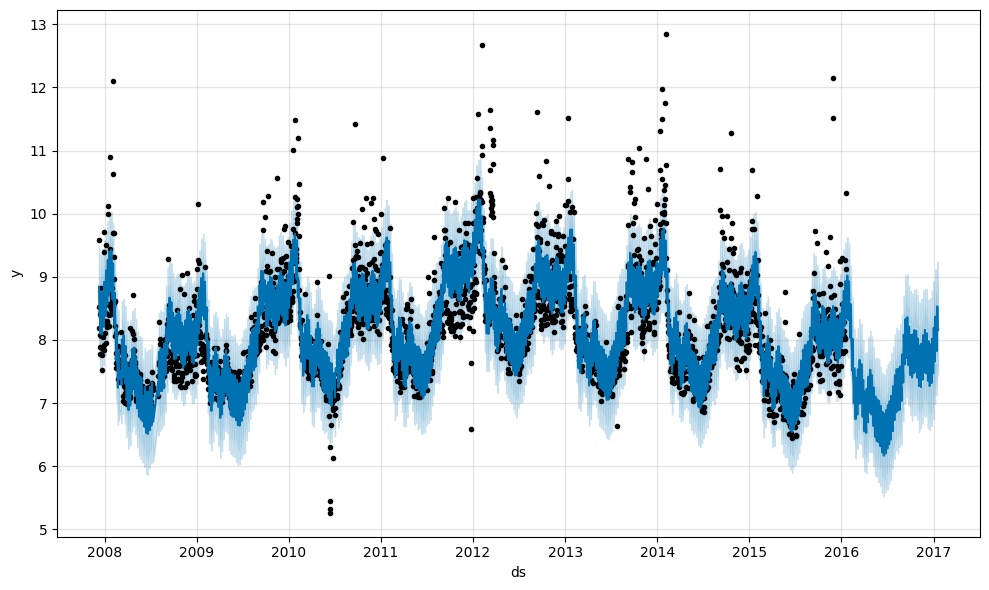

In [7]:
fig1 = m.plot(forecast)

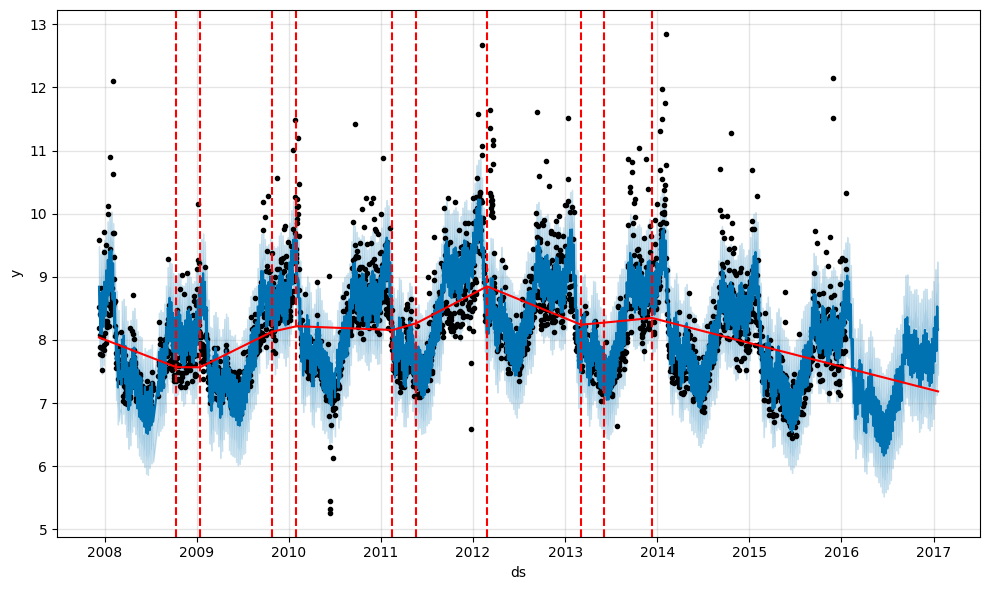

In [8]:
fig_cp = m.plot(forecast)
a = add_changepoints_to_plot(fig_cp.gca(), m, forecast)

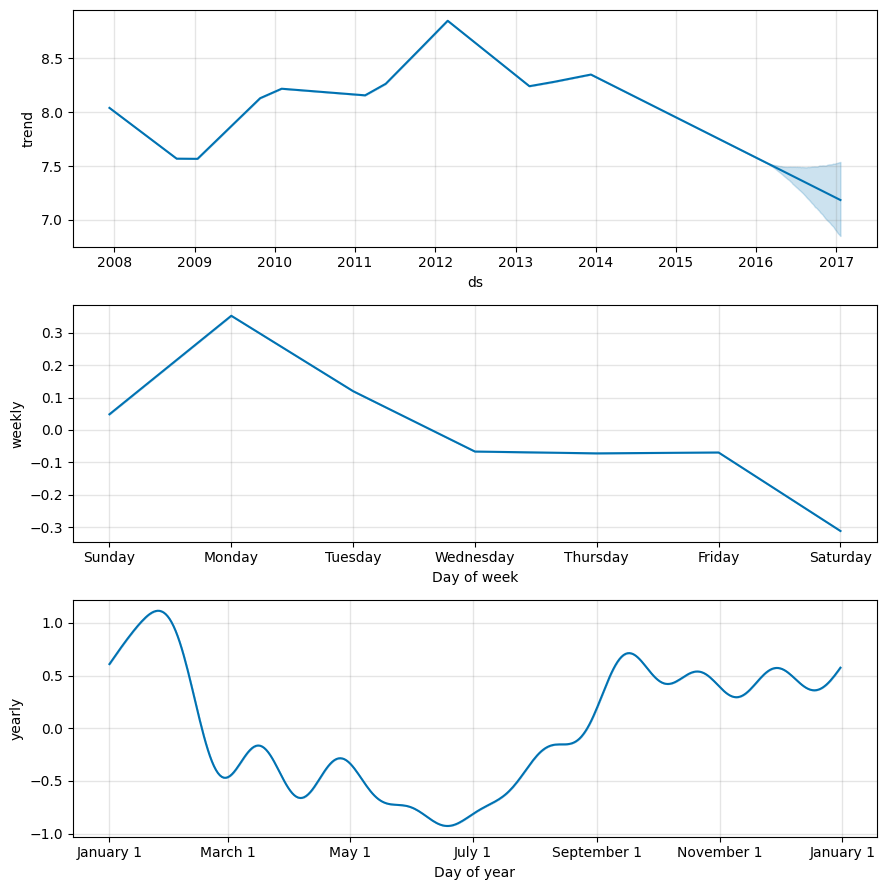

In [9]:
fig2 = m.plot_components(forecast)